### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

import csv
import requests
urls = {"Tienda 1": url, "Tienda 2": url2, "Tienda 3": url3, "Tienda 4": url4}
# Diccionario para asociar nombres de tiendas con sus datos
tiendas = {}
for nombre, url in urls.items():
    response = requests.get(url)
    response.raise_for_status()  # Verificar si la solicitud fue exitosa
    # Leer el contenido del archivo CSV
    lines = response.text.splitlines()
    reader = csv.DictReader(lines)
    tiendas[nombre]=list(reader)

# 1. Análisis de Facturación

In [9]:
# Inicializar el total general de ventas
total_general = 0

list_tiendas=[]
list_ventas=[]
# Iterar sobre las tiendas para calcular las ventas
for tienda, datos in tiendas.items():
    total_tienda = sum(float(precio['Precio']) for precio in datos)
    print(f"Ventas de {tienda}: {total_tienda:,}")
    list_tiendas.append(tienda)
    list_ventas.append(total_tienda)
    total_general += total_tienda


# Imprimir el total general de ventas
print(f"Total general de ventas: {total_general:,}")

Ventas de Tienda 1: 1,150,880,400.0
Ventas de Tienda 2: 1,116,343,500.0
Ventas de Tienda 3: 1,098,019,600.0
Ventas de Tienda 4: 1,038,375,700.0
Total general de ventas: 4,403,619,200.0


# 2. Ventas por categoría

In [14]:
categoria = {"Tienda 1": {}, "Tienda 2": {}, "Tienda 3": {}, "Tienda 4":{}}
for tienda, lista in tiendas.items():
    for i in range(len(lista)):
        if lista[i]['Categoría del Producto'] not in categoria[tienda]:
             categoria[tienda][lista[i]["Categoría del Producto"]]= float(lista[i]["Precio"])
        else:
            categoria[tienda][lista[i]["Categoría del Producto"]]+= float(lista[i]["Precio"])

for tienda, dicc in categoria.items():
    sorted_dicc = dict(sorted(dicc.items(), key=lambda x: x[1], reverse=True)[:5])

    categoria[tienda] = sorted_dicc

    print(f"Las 5 categorias con mayor venta de {tienda} son:")
    print("\n")
    for i in categoria[tienda]:
        print(f"{i}: {categoria[tienda][i]:,}")
    print("\n")


Las 5 categorias con mayor venta de Tienda 1 son:


Electrónicos: 429,493,500.0
Electrodomésticos: 363,685,200.0
Muebles: 187,633,700.0
Instrumentos musicales: 91,299,000.0
Deportes y diversión: 39,290,000.0


Las 5 categorias con mayor venta de Tienda 2 son:


Electrónicos: 410,831,100.0
Electrodomésticos: 348,567,800.0
Muebles: 176,426,300.0
Instrumentos musicales: 104,990,300.0
Deportes y diversión: 34,744,500.0


Las 5 categorias con mayor venta de Tienda 3 son:


Electrónicos: 410,775,800.0
Electrodomésticos: 329,237,900.0
Muebles: 201,072,100.0
Instrumentos musicales: 77,380,900.0
Deportes y diversión: 35,593,100.0


Las 5 categorias con mayor venta de Tienda 4 son:


Electrónicos: 409,476,100.0
Electrodomésticos: 283,260,200.0
Muebles: 192,528,900.0
Instrumentos musicales: 75,102,400.0
Deportes y diversión: 33,350,100.0




# 3. Calificación promedio de la tienda


In [24]:
calificacion = {"Tienda 1":0 , "Tienda 2": 0, "Tienda 3": 0, "Tienda 4": 0}
for tienda, lista in tiendas.items():
    for i in range(len(lista)):
         calificacion[tienda]+=float(lista[i]['Calificación'])

    calificacion[tienda]=round(calificacion[tienda]/len(lista),2)

    print(f"La calificación promedio de {tienda} es: {calificacion[tienda]:,}")

    print("\n")

La calificación promedio de Tienda 1 es: 3.98


La calificación promedio de Tienda 2 es: 4.04


La calificación promedio de Tienda 3 es: 4.05


La calificación promedio de Tienda 4 es: 4.0




# 4. Productos más y menos vendidos

In [29]:
producto = {"Tienda 1": {}, "Tienda 2": {}, "Tienda 3": {}, "Tienda 4":{}}
for tienda, lista in tiendas.items():
    for i in range(len(lista)):
        if lista[i]['Producto'] not in producto[tienda]:
            producto[tienda][lista[i]["Producto"]]= 1
        else:
            producto[tienda][lista[i]["Producto"]]+= 1
#print(producto)


# Calcular el producto más vendido y el menos vendido por cada tienda
for tienda, dicc in producto.items():
    # Obtener el producto más vendido y el menos vendido
    producto_mas_vendido = max(dicc, key=dicc.get)
    producto_menos_vendido = min(dicc, key=dicc.get)

    # Imprimir resultados
    print(f"En {tienda}:")
    print(f"El producto más vendido es: {producto_mas_vendido} con {dicc[producto_mas_vendido]}")
    print(f"El producto menos vendido es: {producto_menos_vendido} con {dicc[producto_menos_vendido]}")
    print("\n")

En Tienda 1:
El producto más vendido es: Microondas con 60
El producto menos vendido es: Auriculares con micrófono con 33


En Tienda 2:
El producto más vendido es: Iniciando en programación con 65
El producto menos vendido es: Juego de mesa con 32


En Tienda 3:
El producto más vendido es: Kit de bancas con 57
El producto menos vendido es: Bloques de construcción con 35


En Tienda 4:
El producto más vendido es: Cama box con 62
El producto menos vendido es: Guitarra eléctrica con 33




# 5. Envío promedio por tienda

In [27]:
envio = {"Tienda 1":0 , "Tienda 2": 0, "Tienda 3": 0, "Tienda 4": 0}
for tienda, lista in tiendas.items():
    for i in range(len(lista)):
         envio[tienda]+=float(lista[i]['Costo de envío'])

    envio[tienda]=round(envio[tienda]/len(lista),2)

    print(f"El costo de envio promedio de {tienda} es: {envio[tienda]:,}")

    print("\n")

El costo de envio promedio de Tienda 1 es: 26,018.61


El costo de envio promedio de Tienda 2 es: 25,216.24


El costo de envio promedio de Tienda 3 es: 24,805.68


El costo de envio promedio de Tienda 4 es: 23,459.46




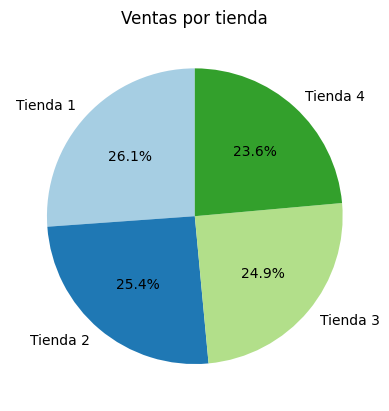

In [30]:
import matplotlib.pyplot as plt

# Crear un gráfico de pastel ventas por tienda
plt.pie(list_ventas, labels=list_tiendas, autopct='%1.1f%%',
             startangle=90,colors=plt.cm.Paired.colors)
plt.title("Ventas por tienda")
plt.show()


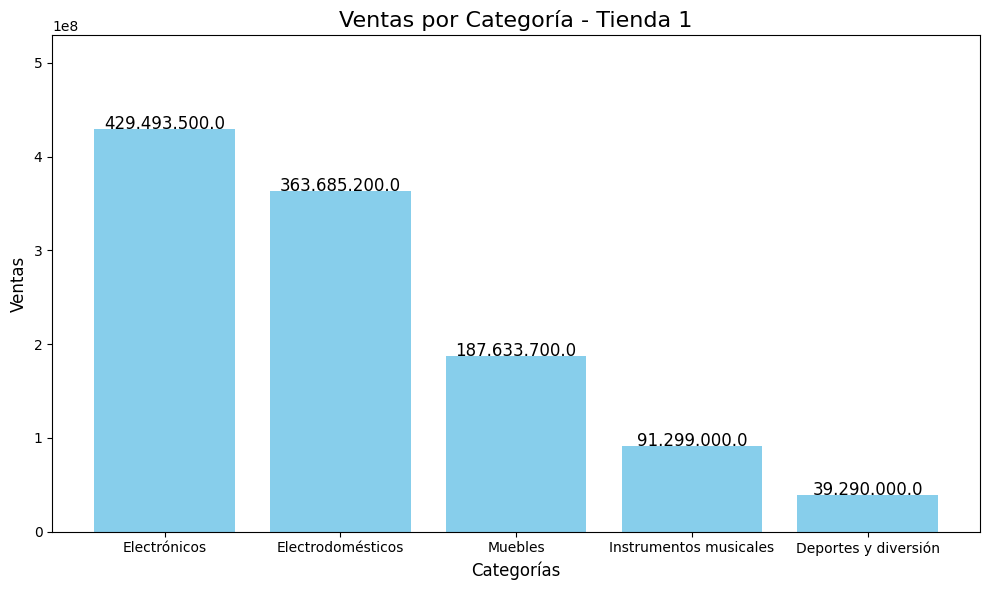

In [32]:
# Obtener las categorías y ventas de la Tienda 1
categorias_tienda1 = list(categoria["Tienda 1"].keys())
ventas_tienda1 = list(categoria["Tienda 1"].values())


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias_tienda1, ventas_tienda1, color='skyblue')
#Agregar etiquetas sobre las barras
for i, valor in enumerate(ventas_tienda1):
    plt.text(i, valor + 0.5, f"{valor:,}".replace(",", "."), ha='center', fontsize=12)

# Ajustar el rango del eje vertical
plt.ylim(0, max(ventas_tienda1) + 100000000)


# Personalizar el gráfico
plt.title("Ventas por Categoría - Tienda 1", fontsize=16)
plt.xlabel("Categorías", fontsize=12)
plt.ylabel("Ventas", fontsize=12)

plt.tight_layout()

# Mostrar el gráfico
plt.show()


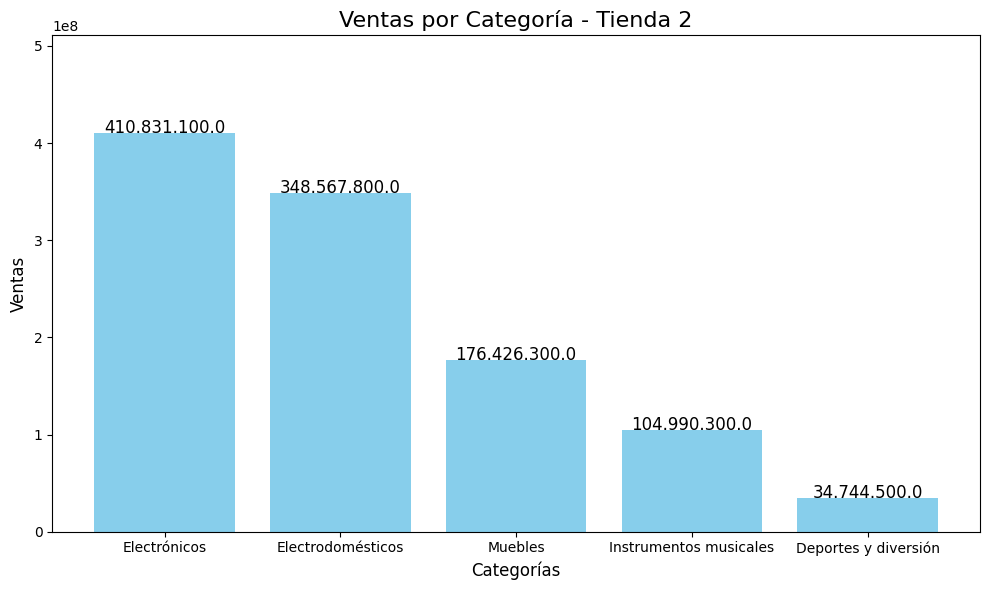

In [35]:
# Obtener las categorías y ventas de la Tienda 1
categorias_tienda2 = list(categoria["Tienda 2"].keys())
ventas_tienda2 = list(categoria["Tienda 2"].values())


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias_tienda2, ventas_tienda2, color='skyblue')
#Agregar etiquetas sobre las barras
for i, valor in enumerate(ventas_tienda2):
    plt.text(i, valor + 0.5, f"{valor:,}".replace(",", "."), ha='center', fontsize=12)

# Ajustar el rango del eje vertical
plt.ylim(0, max(ventas_tienda2) + 100000000)


# Personalizar el gráfico
plt.title("Ventas por Categoría - Tienda 2", fontsize=16)
plt.xlabel("Categorías", fontsize=12)
plt.ylabel("Ventas", fontsize=12)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

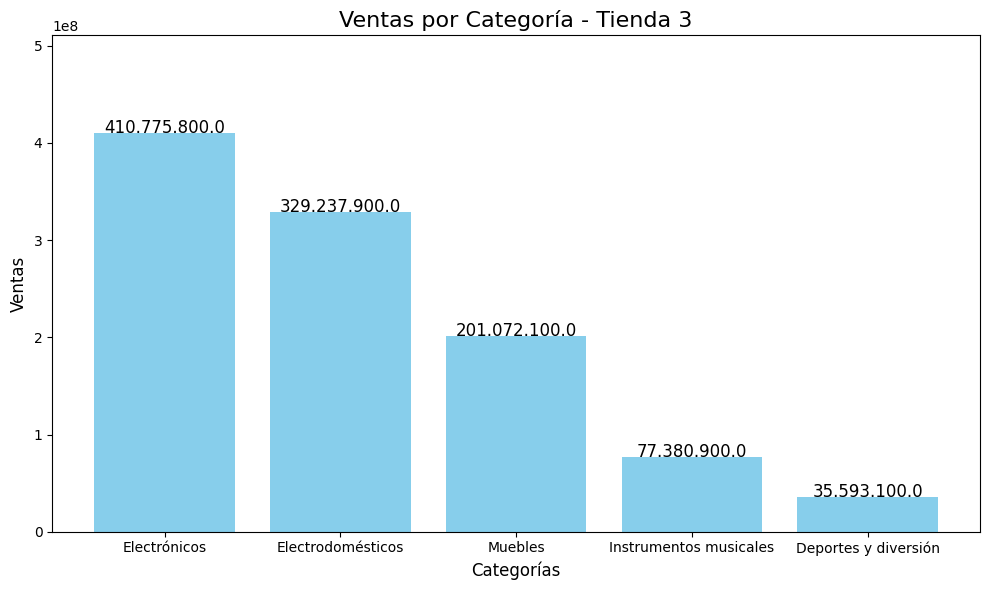

In [34]:
# Obtener las categorías y ventas de la Tienda 1
categorias_tienda3 = list(categoria["Tienda 3"].keys())
ventas_tienda3 = list(categoria["Tienda 3"].values())


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias_tienda3, ventas_tienda3, color='skyblue')
#Agregar etiquetas sobre las barras
for i, valor in enumerate(ventas_tienda3):
    plt.text(i, valor + 0.5, f"{valor:,}".replace(",", "."), ha='center', fontsize=12)

# Ajustar el rango del eje vertical
plt.ylim(0, max(ventas_tienda3) + 100000000)


# Personalizar el gráfico
plt.title("Ventas por Categoría - Tienda 3", fontsize=16)
plt.xlabel("Categorías", fontsize=12)
plt.ylabel("Ventas", fontsize=12)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

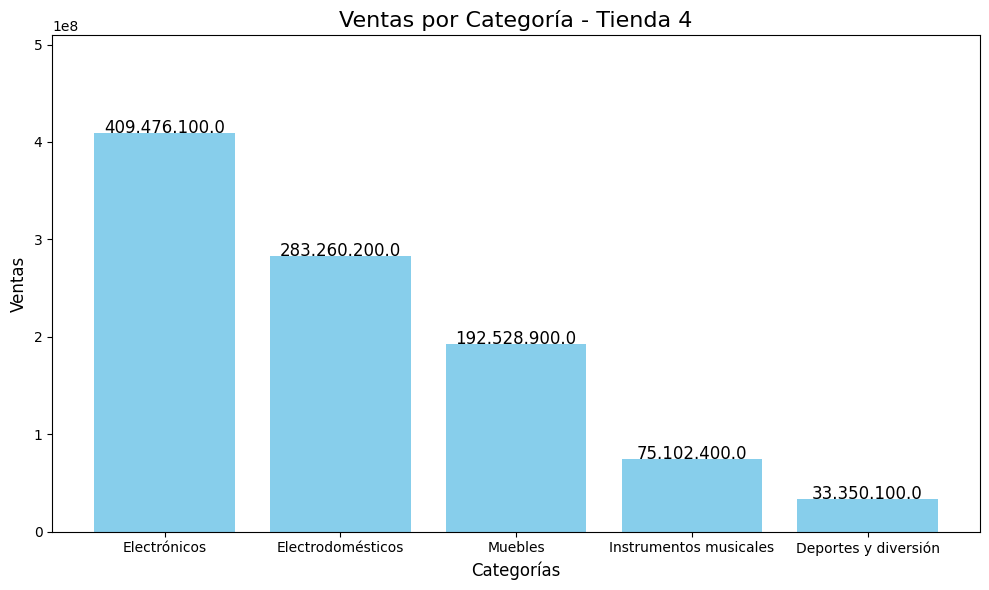

In [36]:
# Obtener las categorías y ventas de la Tienda 1
categorias_tienda4 = list(categoria["Tienda 4"].keys())
ventas_tienda4 = list(categoria["Tienda 4"].values())


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias_tienda4, ventas_tienda4, color='skyblue')
#Agregar etiquetas sobre las barras
for i, valor in enumerate(ventas_tienda4):
    plt.text(i, valor + 0.5, f"{valor:,}".replace(",", "."), ha='center', fontsize=12)

# Ajustar el rango del eje vertical
plt.ylim(0, max(ventas_tienda4) + 100000000)


# Personalizar el gráfico
plt.title("Ventas por Categoría - Tienda 4", fontsize=16)
plt.xlabel("Categorías", fontsize=12)
plt.ylabel("Ventas", fontsize=12)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

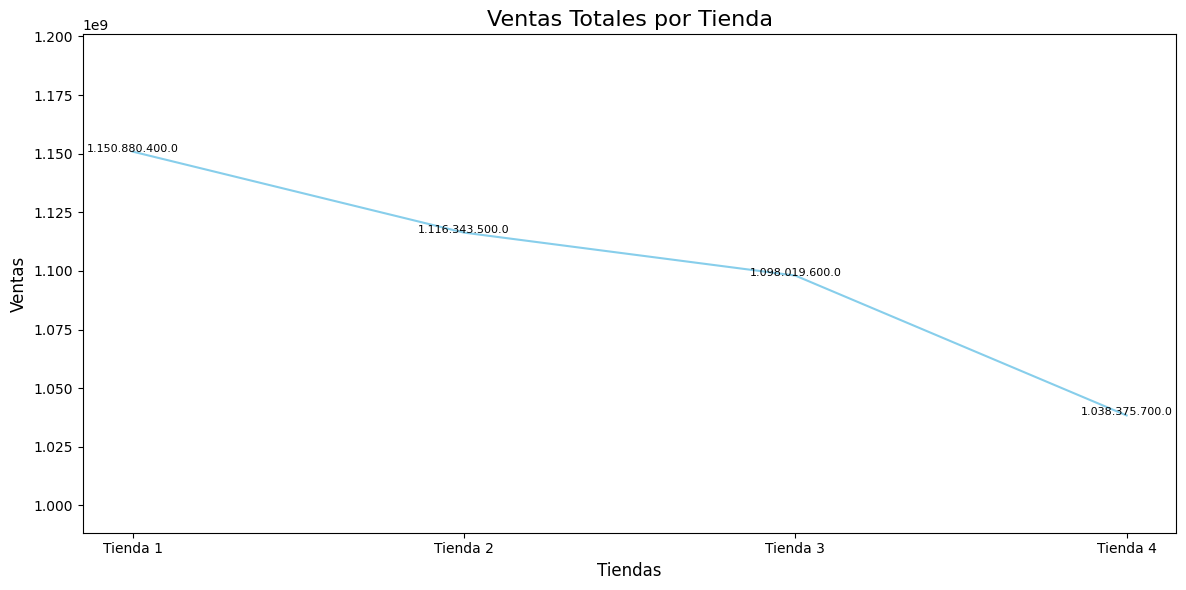

In [37]:
# Crear el gráfico de lineas de ventas totales por tienda
plt.figure(figsize=(12, 6))
plt.plot(list_tiendas, list_ventas, color='skyblue')

#Agregar etiquetas sobre las lineas
for i, valor in enumerate(list_ventas):
    plt.text(i, valor + 0.5, f"{valor:,}".replace(",", "."), ha='center', fontsize=8)

# Ajustar el rango del eje vertical
plt.ylim(min(list_ventas) - 50000000, max(list_ventas) + 50000000 )


# Personalizar el gráfico
plt.title("Ventas Totales por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Ventas", fontsize=12)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Conclusion
### Tras analizar los informes generados con la información proporcionada sobre las cuatro tiendas, puedo recomendar a don Juan que considere la venta de la tienda número 4, ya que presenta el menor nivel de ventas. No obstante, es importante señalar que el análisis no ha sido completamente preciso debido a la falta de datos clave. En particular, la ausencia de información sobre el costo de los productos impide realizar un estudio de rentabilidad, el cual sería un criterio más acertado para determinar qué tienda debería cerrar.